In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Read the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

In [3]:
# Select relevant variables
# We will use 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' as features
# and 'Survived' as the target variable
# First, we need to handle missing values and encode categorical data
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)

In [4]:
# Encode 'Sex' and 'Embarked' as numerical values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [5]:
# Define independent (X) and dependent (y) variables
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

In [6]:
# Split the data into training (60%), development (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Train a decision tree with no restriction on depth
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

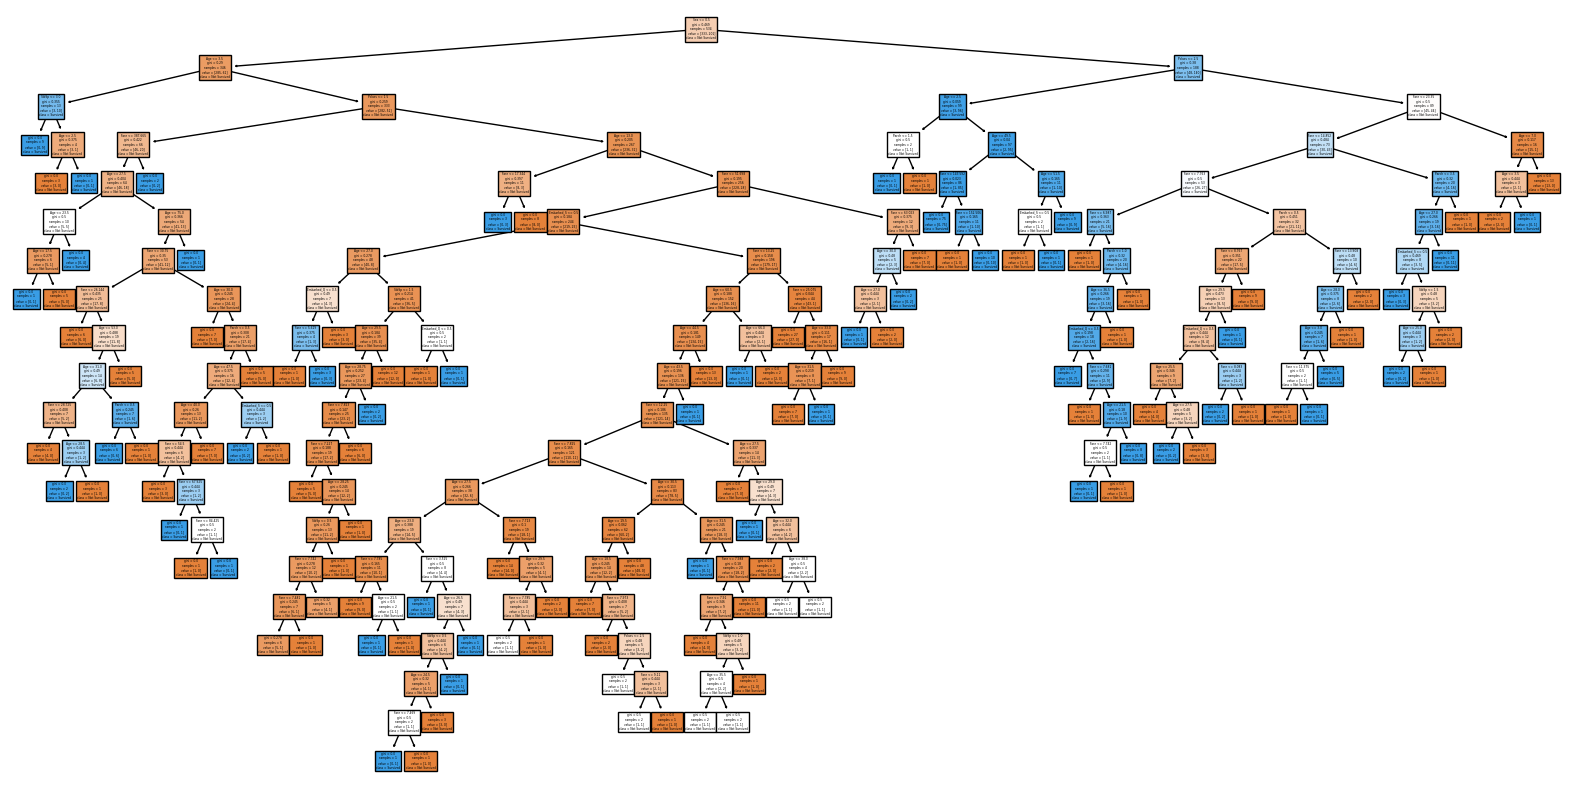

In [8]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [9]:
# Compute and print the accuracy on the development set
dev_predictions = tree_clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, dev_predictions)
print(f'Development Set Accuracy: {dev_accuracy}')

Development Set Accuracy: 0.6910112359550562


In [10]:
# Experiment with different values of max_depth and store accuracies
train_accuracies = []
dev_accuracies = []
max_depths = range(2, 11)

for depth in max_depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    
    train_predictions = tree_clf.predict(X_train)
    dev_predictions = tree_clf.predict(X_dev)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    dev_accuracy = accuracy_score(y_dev, dev_predictions)
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

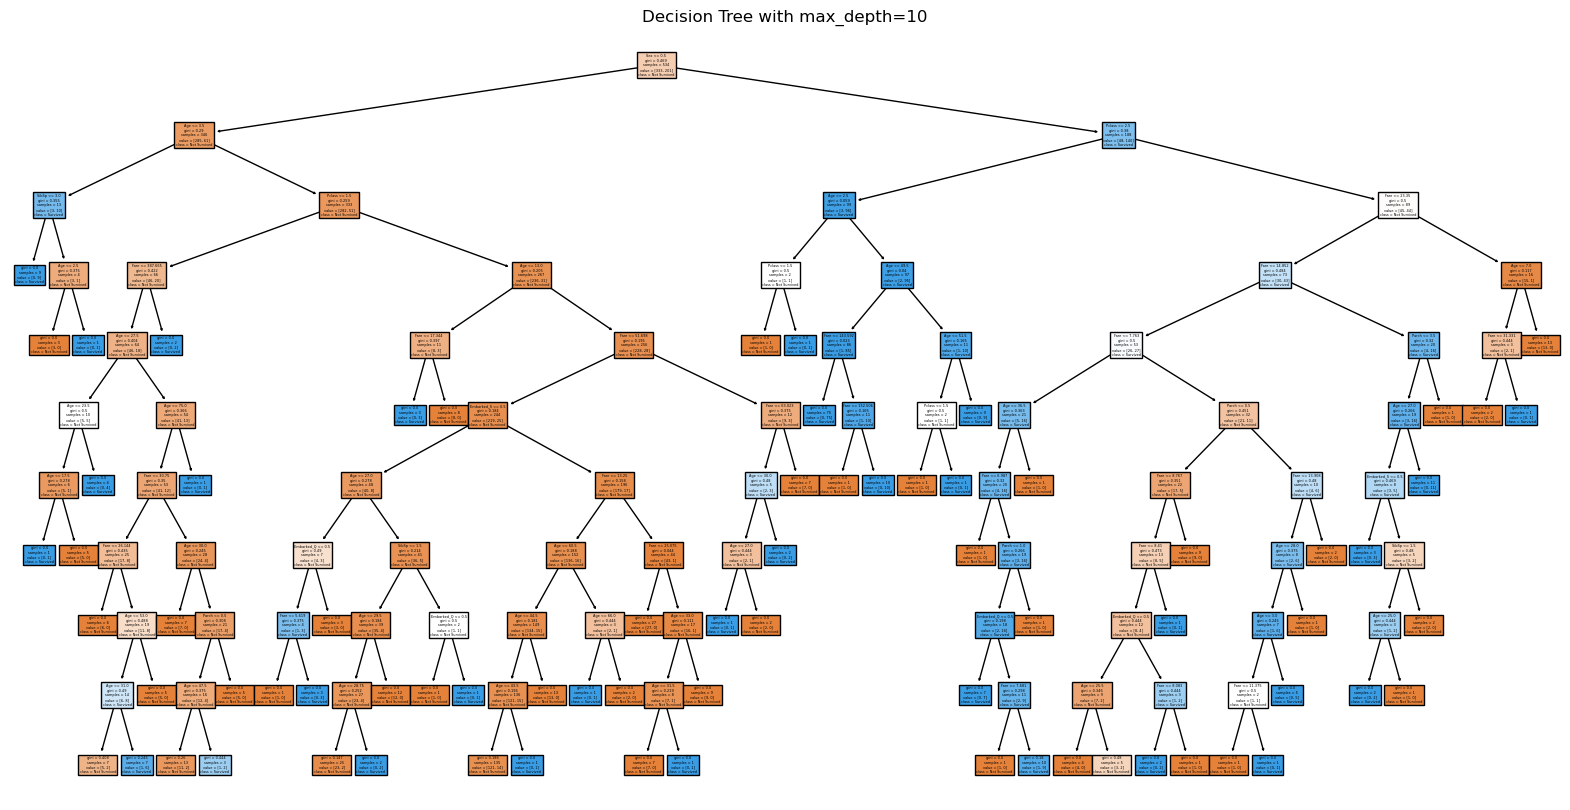

In [12]:
# Plot the decision tree for the current depth
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title(f'Decision Tree with max_depth={depth}')
plt.show()

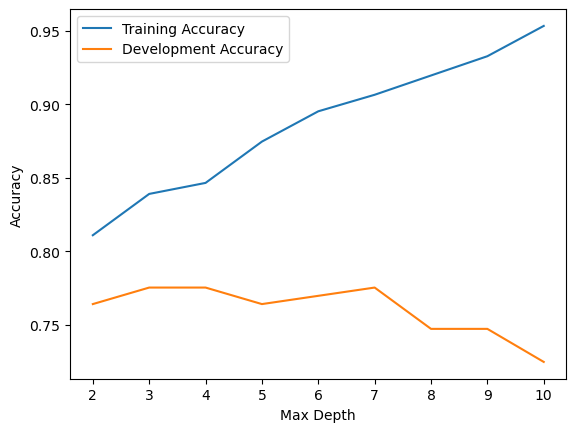

In [13]:
# Plot training and development accuracies
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Analyze the shape of the accuracy lines
# The training accuracy typically increases or stays the same with increasing depth,
# whereas the development accuracy may increase up to a point and then decrease,
# indicating overfitting when the model complexity is too high.

In [15]:
# Train the final model with the chosen max_depth and evaluate on the test set
# Choosing max_depth that gave the best development accuracy (you may need to choose based on your plot)
best_depth = max_depths[np.argmax(dev_accuracies)]
final_tree_clf = DecisionTreeClassifier(max_depth=best_depth)
final_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
# Evaluate the final model on the test set
test_predictions = final_tree_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Set Accuracy: {test_accuracy}')

Test Set Accuracy: 0.8212290502793296


In [4]:
#Creating bagged random forest
# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [7]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [8]:
# Preprocessing
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [9]:
# Encode categorical features
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

X = data[features]
y = data[target]

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Bagging
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f'Bagging Model Accuracy: {bagging_accuracy:.4f}')

Bagging Model Accuracy: 0.8101


In [14]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')

Random Forest Model Accuracy: 0.8212


In [15]:
# Boosting
boost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
boost_accuracy = accuracy_score(y_test, boost_pred)
print(f'Boosting Model Accuracy: {boost_accuracy:.4f}')

Boosting Model Accuracy: 0.8101


In [16]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

    Feature  Importance
1       Sex    0.271410
5      Fare    0.265010
2       Age    0.249995
0    Pclass    0.086957
3     SibSp    0.053685
4     Parch    0.039897
6  Embarked    0.033044


In [ ]:
# From the feature importance above, it indicates that the Sex of the passenger (with an importance of 0.27141.) is the most significant predictor in determining survival, followed closely by the fare paid for the ticket and the age of the passenger.

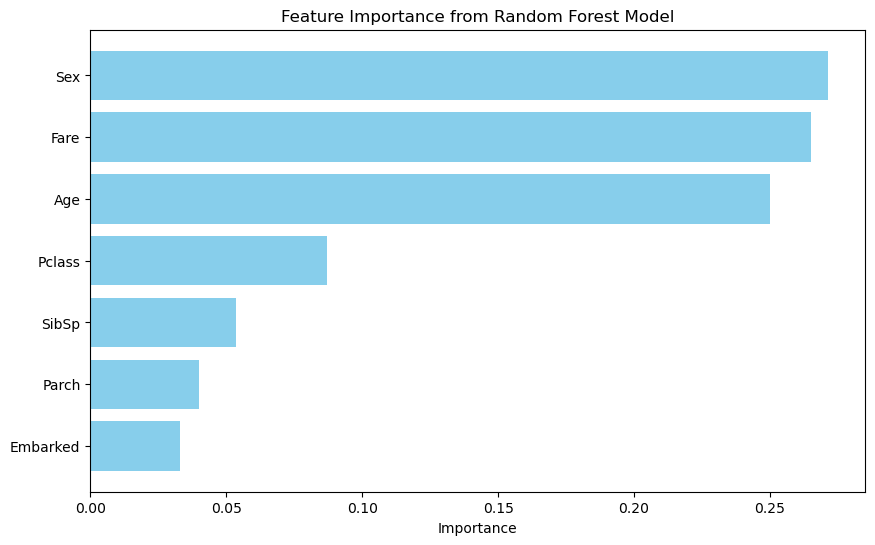

In [17]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Tune Parameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

In [19]:
# Grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [20]:
# Best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [21]:
best_rf_pred = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)

In [22]:
print(f'Best Random Forest Model Accuracy: {best_rf_accuracy:.4f}')
print(f'Best Parameters: {best_params}')

Best Random Forest Model Accuracy: 0.8156
Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [23]:
# Report all accuracies
print(f'Bagging Model Accuracy: {bagging_accuracy:.4f}')
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')
print(f'Boosting Model Accuracy: {boost_accuracy:.4f}')
print(f'Best Random Forest Model Accuracy: {best_rf_accuracy:.4f} with parameters {best_params}')

Bagging Model Accuracy: 0.8101
Random Forest Model Accuracy: 0.8212
Boosting Model Accuracy: 0.8101
Best Random Forest Model Accuracy: 0.8156 with parameters {'max_depth': 10, 'n_estimators': 200}


In [ ]:
#The best-performing model is the Random Forest model with the tuned parameters {'max_depth': 10, 'n_estimators': 200}, achieving an accuracy of 81.56%. This model outperformed the other models, including the Bagging and Boosting models, as well as the initial Random Forest model without parameter tuning.